In [21]:
import pandas as pd
import numpy as np
import glob

In [213]:
result_file = '/tmp/fuzzydatatest/20220209-150332_perf.csv'
perf_df = pd.read_csv(result_file, index_col=0)
perf_df

,src,dst,op,args,start_time,end_time,elapsed_time
0,"('artifact_0', 'artifact_1')",artifact_2,merge,{'key_col': 'mBO1Y__iban'},12877.973619,12882.161719,4.188101
1,"('artifact_0',)",artifact_3,pivot,"{'index_cols': ['PCwhC__free_email_domain'], '...",12882.259516,12883.570093,1.310578
2,"('artifact_2',)",artifact_4,groupby,{'group_columns': ['vrEzC__first_name_female']...,12883.600800,12884.186582,0.585782
3,"('artifact_4',)",artifact_5,project,"{'output_cols': ['vK2op__random_int', 'ohnOS__...",12884.257724,12884.880029,0.622305
4,"('artifact_5',)",artifact_6,project,{'output_cols': ['vK2op__random_int']},12884.944562,12884.952517,0.007955
5,"('artifact_1', 'artifact_7')",artifact_8,merge,{'key_col': 'C9KCi__ean13'},12902.110018,12902.848913,0.738895
6,"('artifact_8',)",artifact_9,sample,{'frac': 0.48},12902.904409,12903.310481,0.406072


In [214]:
import numpy as np

perf_df['end_time_seconds'] = np.cumsum(perf_df.elapsed_time)
perf_df['start_time_seconds'] = end_time.shift().fillna(0)
perf_df

NameError: name 'end_time' is not defined

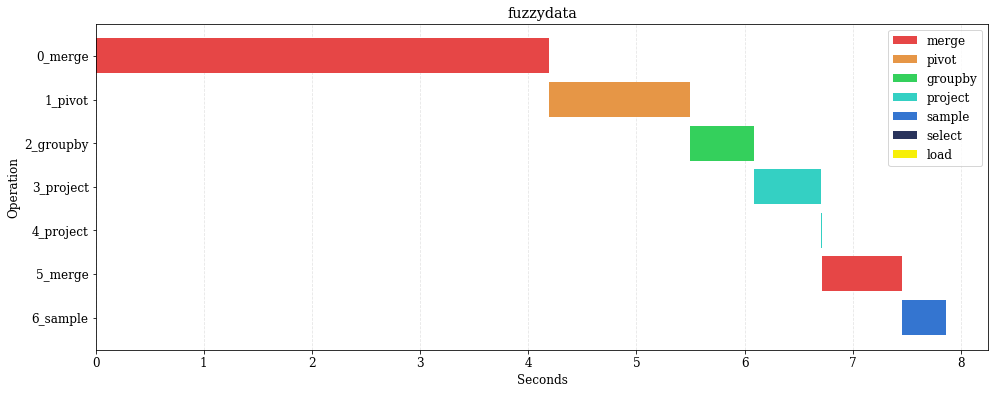

In [215]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# GANTT Chart function

def plot_gantt(df, title='fuzzydata', x_range=None):
    
    # Adapted from 
    # https://towardsdatascience.com/gantt-charts-with-pythons-matplotlib-395b7af72d72 
    
    #### Prepare the DF ####
    c_dict = {'merge':'#E64646', 'pivot':'#E69646', 'groupby':'#34D05C',
              'project':'#34D0C3', 'sample':'#3475D0' , 'select': '#29335C' , 'load': '#f7ef07'}
    
    df['end_time_seconds'] = np.cumsum(perf_df.elapsed_time)
    df['start_time_seconds'] = df['end_time_seconds'].shift().fillna(0)
    df['task_label'] = df.index.astype(str) +'_'+ df['op']
    df['color'] = df['op'].apply(lambda x: c_dict[x])
    df = df.iloc[::-1]
    
    #### PLOT #####
    fig, ax = plt.subplots(1, figsize=(16,6))
    ax.barh(df.task_label, df.elapsed_time, left=df.start_time_seconds, 
            color=df.color)
    ##### LEGENDS #####
    
    legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
    plt.legend(handles=legend_elements)
   
    ##### TICKS #####
    #xticks = np.arange(0, df.end_num.max()+1, 3)
    #xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
    #xticks_minor = np.arange(0, df.end_num.max()+1, 1)
    #ax.set_xticks(xticks)
    #ax.set_xticks(xticks_minor, minor=True)
    #ax.set_xticklabels(xticks_labels[::3])
    
    ax.set_axisbelow(True)
    ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.2, which='both')
    
    if x_range:
        plt.xlim(x_range)
    plt.title(title)
    plt.ylabel('Operation')
    plt.xlabel('Seconds')
    plt.show()
    
plot_gantt(perf_df)

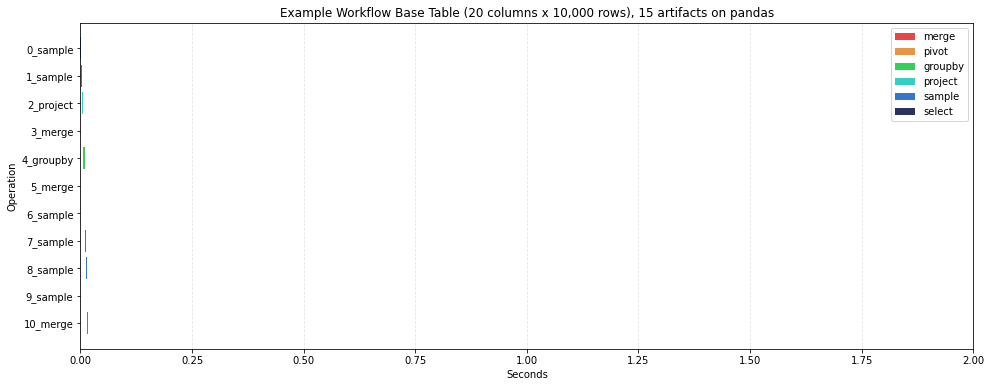

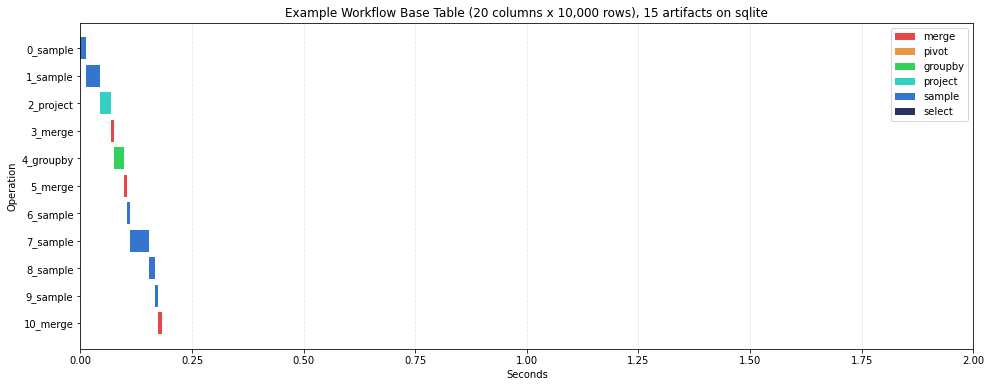

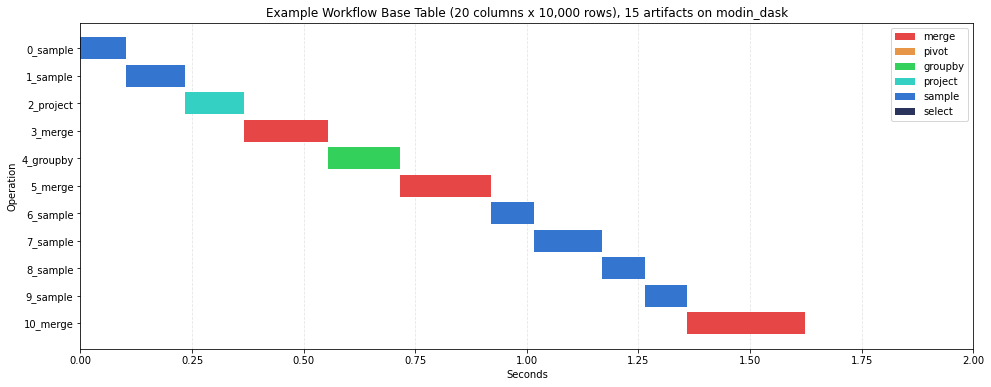

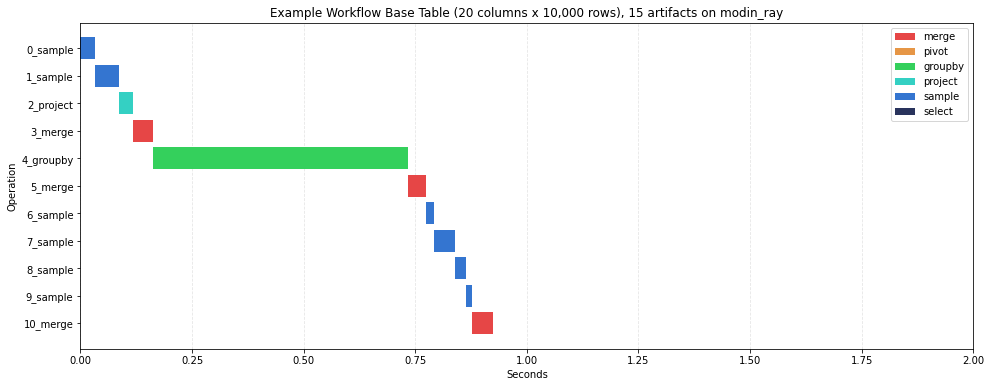

In [15]:
# Plot all gantt charts

BASE_DIR = '/tmp/fuzzydatatest/'
frameworks = ['pandas', 'sqlite', 'modin_dask', 'modin_ray']

for f in frameworks:
    result_file = glob.glob(f"{BASE_DIR}/{f}/*_perf.csv")[0]
    perf_df = pd.read_csv(result_file, index_col=0)
    plot_gantt(perf_df, title=f'Example Workflow Base Table (20 columns x 10,000 rows), 15 artifacts on {f}', x_range=[0.0,2.0])

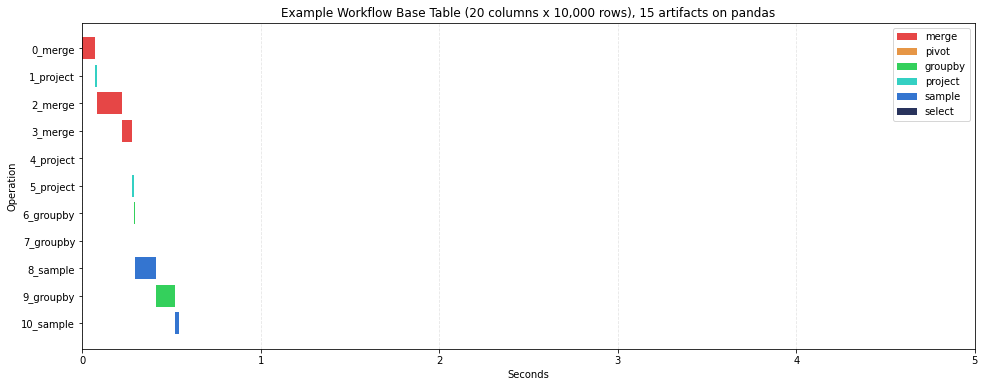

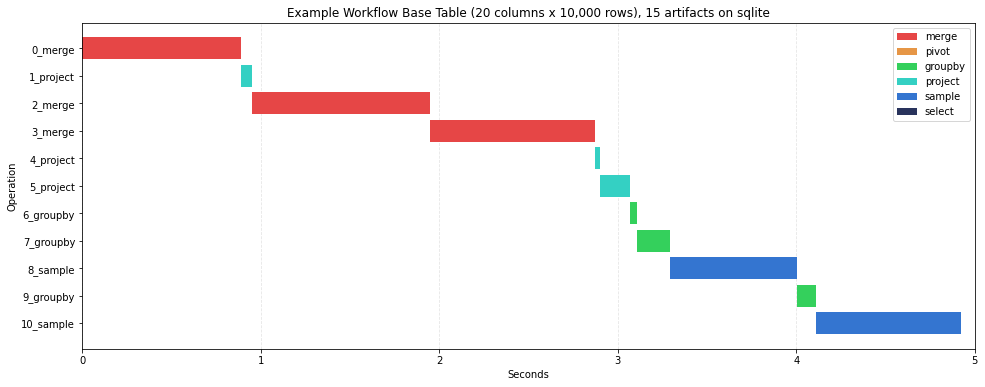

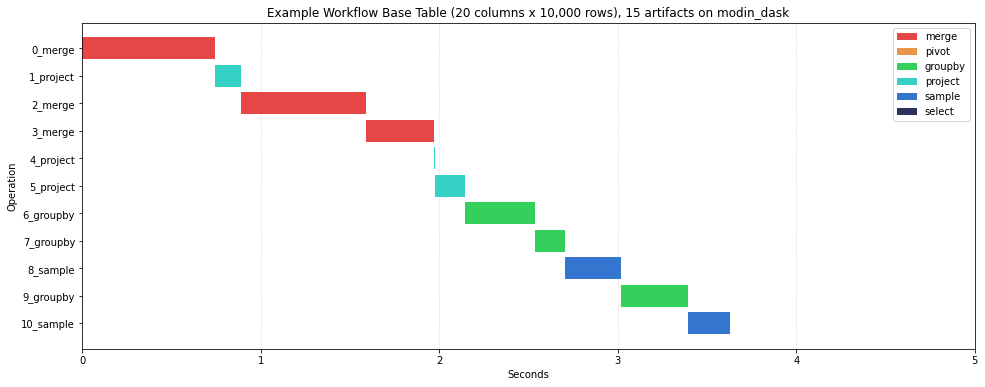

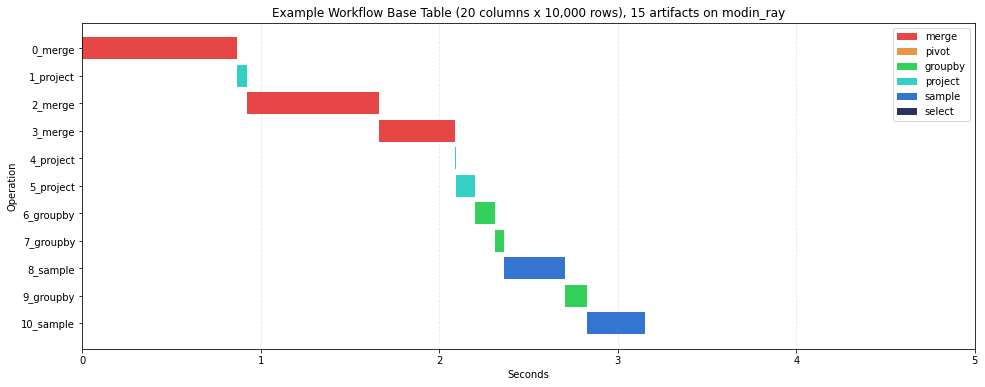

In [17]:
BASE_DIR = '/tmp/fuzzydatatest_big/'
frameworks = ['pandas', 'sqlite', 'modin_dask', 'modin_ray']

for f in frameworks:
    result_file = glob.glob(f"{BASE_DIR}/{f}/*_perf.csv")[0]
    perf_df = pd.read_csv(result_file, index_col=0)
    plot_gantt(perf_df, title=f'Example Workflow Base Table (20 columns x 100,000 rows), 15 artifacts on {f}',  x_range=[0.0, 5.0])

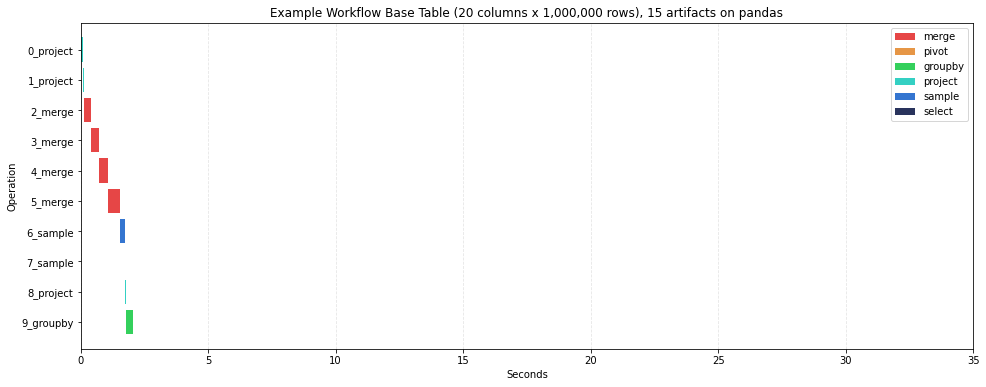

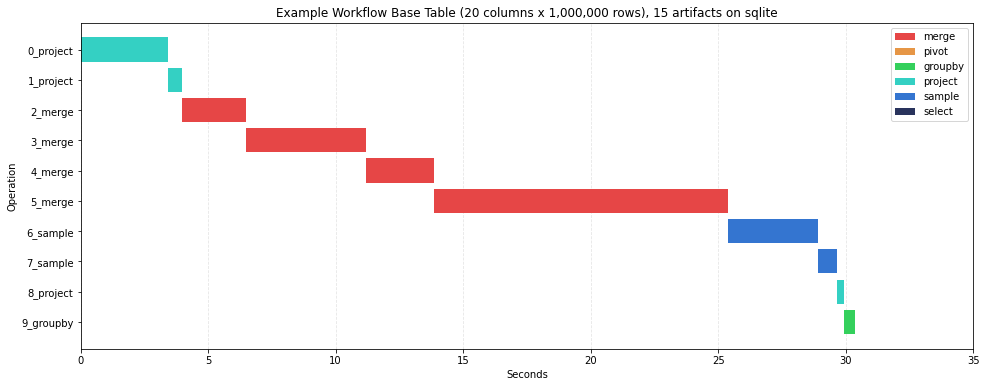

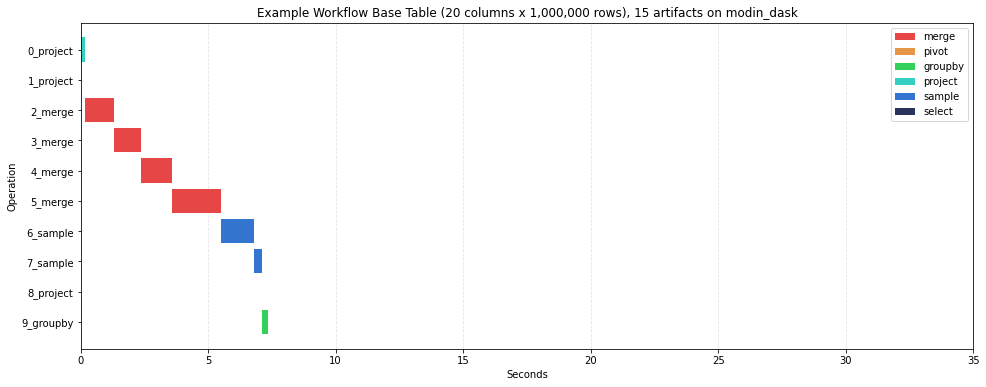

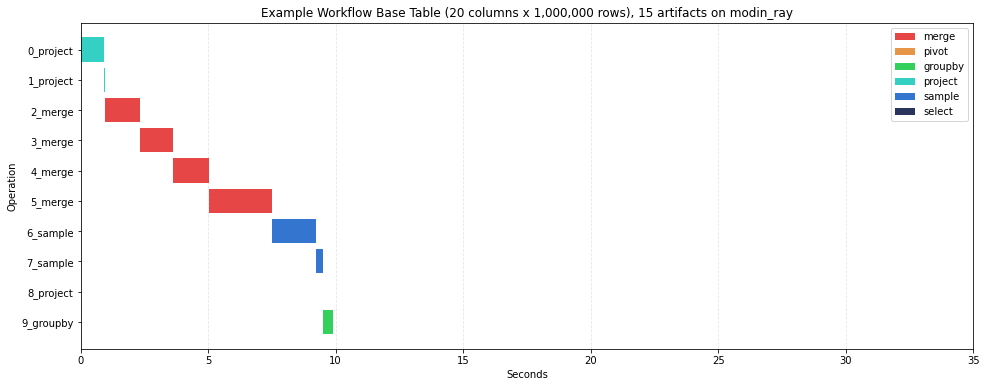

In [21]:
BASE_DIR = '/tmp/fuzzydatatest_1m/'
frameworks = ['pandas', 'sqlite', 'modin_dask', 'modin_ray']

for f in frameworks:
    result_file = glob.glob(f"{BASE_DIR}/{f}/*_perf.csv")[0]
    perf_df = pd.read_csv(result_file, index_col=0)
    plot_gantt(perf_df, title=f'Example Workflow Base Table (20 columns x 1,000,000 rows), 15 artifacts on {f}',  x_range=[0.0, 35.0])

# Large DataFrame Tests - NYC CAB

In [221]:
BASE_DIR = '/mnt/roscoe/data/fuzzydata/fuzzydatatest/nyc-cab/'
frameworks = ['pandas', 'sqlite', 'modin_dask', 'modin_ray']

all_perfs = []
for f in frameworks:
    result_file = glob.glob(f"{BASE_DIR}/{f}/*_perf.csv")[0]
    perf_df = pd.read_csv(result_file, index_col=0)
    perf_df['end_time_seconds'] = np.cumsum(perf_df.elapsed_time)
    perf_df['start_time_seconds'] = perf_df['end_time_seconds'].shift().fillna(0)
    perf_df['framework'] = f
    all_perfs.append(perf_df)
    #plot_gantt(perf_df, title=f'Example Workflow 1.18 GB CSV load/groupby on {f}',  x_range=[0.0, 320])
    
nyc_cab_perfs = pd.concat(all_perfs, ignore_index=True)

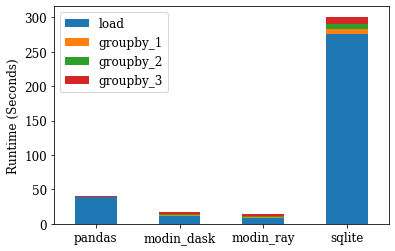

In [252]:
new_op_labels = ['load', 'groupby_1', 'groupby_2', 'groupby_3']
nyc_cab_perfs['op'] = np.tile(new_op_labels,4)
pivoted = nyc_cab_perfs.pivot(index='framework', columns='op', values='elapsed_time')
pivoted = pivoted.reindex(['pandas', 'modin_dask', 'modin_ray', 'sqlite'])[new_op_labels]
ax = pivoted.plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.legend()
plt.xlabel('Client')
plt.ylabel('Runtime (Seconds)')
plt.savefig('real_example.pdf', bbox_inches='tight')

# Combined Performance / Scaling Graph

In [195]:
BASE_DIR = '/mnt/roscoe/data/fuzzydata/fuzzydata_scaling_test_3/'
frameworks = ['pandas', 'sqlite', 'modin_dask', 'modin_ray']
sizes = ['1000', '10000', '100000', '1000000', '5000000']

all_perfs = []

for framework in frameworks:
    for size in sizes:
        input_dir = f"{BASE_DIR}/{framework}_{size}/"
        try:
            #print(f"{input_dir}/*_perf.csv")
            perf_file = glob.glob(f"{input_dir}/*_perf.csv")[0]
            perf_df = pd.read_csv(perf_file, index_col=0)
            perf_df['end_time_seconds'] = np.cumsum(perf_df.elapsed_time)
            perf_df['start_time_seconds'] = perf_df['end_time_seconds'].shift().fillna(0)
            perf_df['framework'] = framework
            perf_df['size'] = size
            all_perfs.append(perf_df)
        except (IndexError, FileNotFoundError) as e:
            #raise(e)
            pass
        
all_perfs_df = pd.concat(all_perfs, ignore_index=True)

In [206]:
total_wf_times = all_perfs_df.loc[all_perfs_df.dst == 'artifact_14'][['framework','size','end_time_seconds']].reset_index(drop=True).pivot(index='size', columns='framework', values='end_time_seconds')
total_wf_times = total_wf_times.rename_axis('Client')
total_wf_times = total_wf_times[['pandas', 'modin_dask', 'modin_ray', 'sqlite']]
total_wf_times

framework,pandas,modin_dask,modin_ray,sqlite
Client,,,,
1000,0.166755,8.632974,3.613448,1.013450
10000,0.297728,8.479685,4.972562,1.545641
100000,1.586486,11.340711,11.755317,9.051750
1000000,17.604799,39.061373,66.273532,95.035244
5000000,102.372080,249.791889,309.989289,536.421765


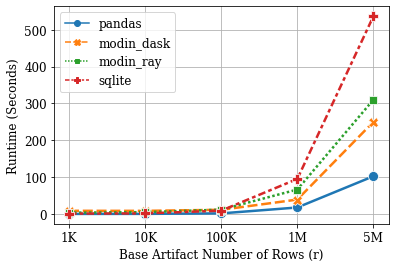

In [207]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)


x_axis_replacements = ['1K', '10K', '100K', '1M', '5M']


plt.figure(figsize=(6,4))

ax = sns.lineplot(data=total_wf_times, markers=True, linewidth=2.5, markersize=10)
plt.xticks(total_wf_times.index, x_axis_replacements)
plt.grid()
plt.xlabel('Base Artifact Number of Rows (r)')
plt.ylabel('Runtime (Seconds)')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

plt.savefig("scaling.pdf", bbox_inches='tight')

In [198]:
breakdown = all_perfs_df[['framework', 'size', 'op', 'elapsed_time']].groupby(['framework', 'size', 'op']).sum().reset_index()
pivoted_breakdown = breakdown.pivot(index=['size', 'framework'], columns=['op'], values='elapsed_time')
pivoted_breakdown

op                    groupby        load      merge   project      sample
size    framework                                                         
1000    modin_dask   3.736020    0.964599   1.637316  0.014630    2.280409
        modin_ray    1.150594    0.976401   0.887876  0.001703    0.596874
        pandas       0.020367    0.135506   0.007725  0.000788    0.002370
        sqlite       0.226957    0.459277   0.071912  0.038915    0.216388
10000   modin_dask   3.727510    0.728262   1.583250  0.013887    2.426775
        modin_ray    2.008327    1.084527   0.911362  0.002284    0.966062
        pandas       0.034245    0.239338   0.011994  0.000762    0.011388
        sqlite       0.138729    0.976343   0.095723  0.031465    0.303382
100000  modin_dask   4.600197    0.946565   1.713775  0.012987    4.067187
        modin_ray    5.845247    1.211348   0.952283  0.002605    3.743834
        pandas       0.176901    1.184018   0.060175  0.001792    0.163600
        sqlite       0.171780    4.721583   0.082400  0.020217    4.055770
1000000 modin_dask   9.279324    3.672854   2.706160  0.012175   23.390860
        modin_ray   26.593379    2.423478   1.541365  0.002229   35.713081
        pandas       1.452458   11.329546   0.596975  0.018233    4.207587
        sqlite       0.098617   42.177123   0.042615  0.019873   52.697016
5000000 modin_dask  19.936676   14.097403  15.949607  0.012280  199.795924
        modin_ray   58.641511    9.556869   3.867007  0.004887  237.919016
        pandas       6.597224   55.888851   5.536492  0.134976   34.214537
        sqlite       0.091693  222.962651   0.042906  0.029142  313.295374

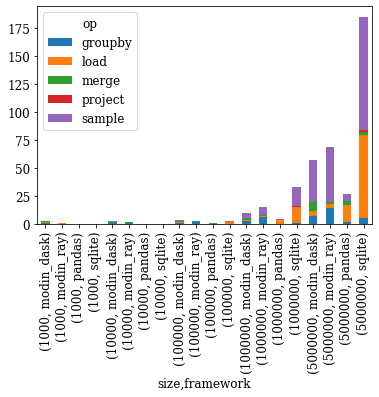

In [95]:
pivoted_breakdown.plot.bar(stacked=True)
plt.savefig("breakdown.pdf", bbox_inches='tight')

In [96]:
breakdown

,framework,size,op,elapsed_time
0,modin_dask,1000,groupby,0.943722
1,modin_dask,1000,load,0.767841
2,modin_dask,1000,merge,0.848160
3,modin_dask,1000,project,0.012273
4,modin_dask,1000,sample,0.450227
...,...,...,...,...
95,sqlite,5000000,groupby,4.970180
96,sqlite,5000000,load,74.965030
97,sqlite,5000000,merge,2.632918
98,sqlite,5000000,project,1.296297


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


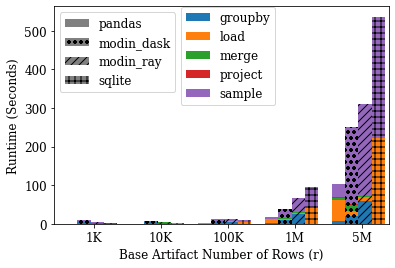

In [36]:
# Sources: https://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars-with-python-pandas

import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt


def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", 
                           x_axis_replacements=None, **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    fig = plt.figure(figsize=(6,4))
    axe = fig.add_subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    hatches = ['', 'oo', '///', '++']
    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col) -0.1)
                rect.set_hatch(hatches[int(i / n_col)]) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    if x_axis_replacements == None:
        x_axis_replacements = df.index
    axe.set_xticklabels(x_axis_replacements, rotation = 0)
    #axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=hatches[i]))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[0.38, 0.545])
    if labels is not None:
        l2 = plt.legend(n, labels)# , loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

cols = ['groupby','load','merge','project','sample']
pbr = pivoted_breakdown.reset_index()
pbr = pbr.set_index('size')
df_splits = [pbr.loc[pbr.framework == f][cols] for f in ['pandas', 'modin_dask', 'modin_ray', 'sqlite']]

# Then, just call :

plot_clustered_stacked(df_splits,['pandas', 'modin_dask', 'modin_ray', 'sqlite'],
                       x_axis_replacements=x_axis_replacements,
                      title='Timing Breakdown Per Operation Type')
plt.xlabel('Base Artifact Number of Rows (r)')
plt.ylabel('Runtime (Seconds)')
plt.savefig("breakdown.eps")

In [152]:
pivoted_breakdown.reset_index().set_index('size')

op,framework,groupby,load,merge,project,sample
size,,,,,,
1000,modin_dask,3.774889,2.303524,1.696320,0.012273,2.251134
1000,modin_ray,1.109647,1.023028,0.861544,0.001655,0.448287
1000,pandas,0.014371,0.020701,0.004797,0.000558,0.001574
1000,sqlite,0.022536,0.163182,0.020051,0.004226,0.048065
10000,modin_dask,3.614480,0.778654,1.674778,0.012663,2.643396
10000,modin_ray,1.951869,1.016722,0.960738,0.002419,0.884713
10000,pandas,0.027426,0.098216,0.007664,0.000627,0.008066
10000,sqlite,0.052543,0.564788,0.021967,0.006360,0.338977
100000,modin_dask,4.286131,1.025131,1.676611,0.012816,4.457524
